In [33]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\berk_\AppData\Local\Programs\Python\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [23]:
X, y = make_blobs(n_samples=60, n_features=2, centers=2, random_state=42, cluster_std=5.6)

In [24]:
X.shape

(60, 2)

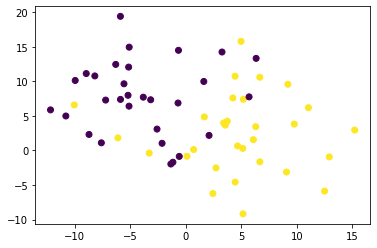

In [25]:
plt.scatter(X.T[0], X.T[1], c=y)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model = KNeighborsClassifier(n_neighbors=5)

In [39]:
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
y_pred = model.predict(X)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm= confusion_matrix(y, y_pred)
pd.DataFrame(cm)

,0,1
0,26,4
1,5,25


In [43]:
((y_pred == 1) & (y == 0)).sum()

4

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=10)

In [47]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
y_pred = model.predict(X_test)

In [49]:
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1
0,6,0
1,2,2


In [50]:
model.score(X_train, y_train)

0.84

In [51]:
model.score(X_test, y_test)

0.8

In [52]:
from sklearn.model_selection import cross_validate

In [53]:
cv = cross_validate(model, X, y, cv=10, return_train_score=True)

In [54]:
cv['train_score']

array([0.85185185, 0.83333333, 0.83333333, 0.81481481, 0.81481481,
       0.87037037, 0.83333333, 0.87037037, 0.88888889, 0.83333333])

In [55]:
cv['test_score']

array([1.        , 1.        , 0.5       , 0.66666667, 0.66666667,
       0.66666667, 0.83333333, 0.83333333, 0.5       , 1.        ])

In [58]:
cv_f = pd.DataFrame(
    {'train': cv['train_score'], 'test': cv['test_score']}
                   )
cv_f

,train,test
0,0.851852,1.000000
1,0.833333,1.000000
2,0.833333,0.500000
3,0.814815,0.666667
4,0.814815,0.666667
5,0.870370,0.666667
6,0.833333,0.833333
7,0.870370,0.833333
8,0.888889,0.500000
9,0.833333,1.000000


In [62]:
cv_f.agg(['mean', 'std'])

,train,test
mean,0.844444,0.766667
std,0.024998,0.195631


In [59]:
cv_f.mean()

train    0.844444
test     0.766667
dtype: float64

In [60]:
cv_f.std()

train    0.024998
test     0.195631
dtype: float64

In [63]:
from ipywidgets import interact

In [67]:
from sklearn.model_selection import LeaveOneOut

In [86]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=5.6, random_state=42)

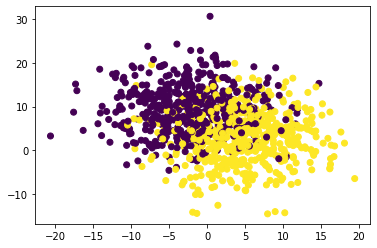

In [87]:
plt.scatter(X.T[0], X.T[1], c=y)

In [88]:
@interact
def knn_interactive(k=(1, 21, 2)):
    model = KNeighborsClassifier(n_neighbors=k)
    cv = cross_validate(model, X, y, cv=10, return_train_score=True)
    cv_f = pd.DataFrame(
    {'train': cv['train_score'], 'test': cv['test_score']}
                   )
    to_be_displayed = cv_f.agg(['mean', 'std']).T
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
    model.fit(X_train, y_train)
    cm = confusion_matrix(y_test, model.predict(X_test))
    
    display(pd.DataFrame(cm))
    display(to_be_displayed)
    display(cv_f['test'].min())
    
    

interactive(children=(IntSlider(value=11, description='k', max=21, min=1, step=2), Output()), _dom_classes=('w…

---

In [89]:
X[:,0] = X[:,0] * 1000
X[:, 1] = X[:,1] * 0.5

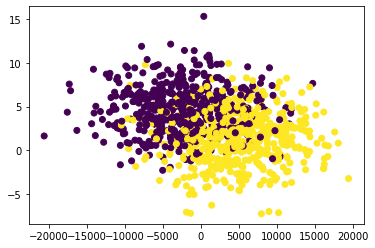

In [90]:
plt.scatter(X.T[0], X.T[1], c=y)

In [92]:
@interact
def knn_interactive(k=(1, 21, 2)):
    model = KNeighborsClassifier(n_neighbors=k)
    cv = cross_validate(model, X, y, cv=10, return_train_score=True)
    cv_f = pd.DataFrame(
    {'train': cv['train_score'], 'test': cv['test_score']}
                   )
    to_be_displayed = cv_f.agg(['mean', 'std']).T
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
    model.fit(X_train, y_train)
    cm = confusion_matrix(y_test, model.predict(X_test))
    
    print('Unscaled variables')
    display(pd.DataFrame(cm))
    display(to_be_displayed)
    display(cv_f['test'].min())

interactive(children=(IntSlider(value=11, description='k', max=21, min=1, step=2), Output()), _dom_classes=('w…

In [93]:
from sklearn.preprocessing import StandardScaler

In [98]:
@interact
def knn_interactive(k=(1, 21, 2), weight=['distance', 'uniform'], p=(1.,3.5, 0.5)):
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1, weights=weight, p=p)
    scaler = StandardScaler()
    Xsc = scaler.fit_transform(X)
    cv = cross_validate(model, Xsc, y, cv=10, return_train_score=True)
    cv_f = pd.DataFrame(
    {'train': cv['train_score'], 'test': cv['test_score']}
                   )
    to_be_displayed = cv_f.agg(['mean', 'std']).T
    
    X_train, X_test, y_train, y_test = train_test_split(Xsc, y, random_state=42, test_size=0.1)
    model.fit(X_train, y_train)
    cm = confusion_matrix(y_test, model.predict(X_test))
    
    print('Scaled variables')
    display(pd.DataFrame(cm))
    display(to_be_displayed)
    display(cv_f['test'].min())

interactive(children=(IntSlider(value=11, description='k', max=21, min=1, step=2), Dropdown(description='weigh…